# Learning Curve

### Constant Model

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

# Constant Model
def constantModel(X):
    return np.mean(np.sin(np.dot(np.pi, X)))

def meanModel():
    return 0

def costFunction(n_samples, y_pred, y):                     # Mean Sqaure Error (MSE)
    return (1 / (2 * n_samples)) * np.sum((y_pred - y)**2)

In [7]:
# Define the function
def problem(X):
    epsilon = np.random.randn(len(X)) * 0.3  # Noise with standard deviation of 0.1
    return np.sin(np.pi * X) + epsilon

(100,)


(-2.0, 2.0)

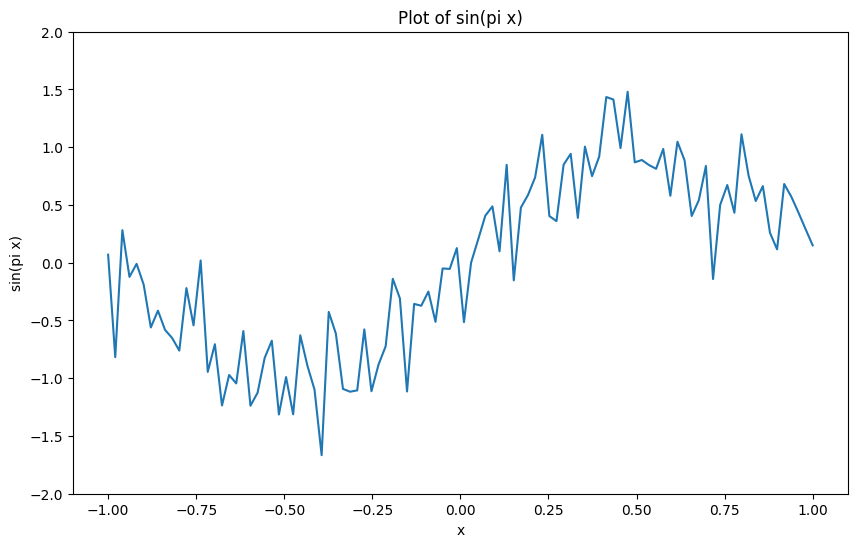

In [8]:
# Generate X features
X = np.linspace(-1, 1, 100)
print(X.shape)

# Compute y values
y = problem(X)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(X, y, label='sin(pi x)')
plt.title('Plot of sin(pi x)')
plt.xlabel('x')
plt.ylabel('sin(pi x)')
plt.ylim(-2, 2)

In [9]:
sample_size_sets = [2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# every value from dataset that possible
E_in = [[] for _ in range(len(sample_size_sets))]
E_d = [[] for _ in range(len(sample_size_sets))]
E_out_all = []


for i in range(len(sample_size_sets)):
    for _ in range(1000):
        # random i values from problem dataset
        rands_X = np.random.choice(X, sample_size_sets[i])
        y_sample = problem(rands_X)
        
        # for calculate E_out
        y_pred_validation = constantModel(X=rands_X)
        E_d[i].append(y_pred_validation)
        
        # for calculate E_in
        y_pred_training = constantModel(X=rands_X)
        E_in[i].append(costFunction(sample_size_sets[i], y_pred=y_pred_training, y=y_sample))

    mean_model = meanModel()
    print("Sample Size: ", sample_size_sets[i])
    
    z = np.square(mean_model - y)
    bias = np.mean(z)
    print(f"Bias: {bias}")
    
    z = np.square(np.array(E_d[i]) - mean_model)
    var_x = np.mean(z)
    variance = np.mean(var_x)
    print(f"Variance: {variance}")
    
    E_out = bias + variance + 0.3 ** 2
    print(f"E_out: {E_out}\n")
    E_out_all.append(E_out)


E_in_all = []
for i in range(len(E_in)):
    E_in_all.append(np.mean(E_in[i]))

print(np.array(E_in_all))
print(np.array(sample_size_sets).shape)


Sample Size:  2
Bias: 0.5825772991181407
Variance: 0.2533319093364803
E_out: 0.925909208454621

Sample Size:  10
Bias: 0.5825772991181407
Variance: 0.0532824791666593
E_out: 0.7258597782848

Sample Size:  20
Bias: 0.5825772991181407
Variance: 0.0244911777812072
E_out: 0.6970684768993479

Sample Size:  30
Bias: 0.5825772991181407
Variance: 0.017325482704197606
E_out: 0.6899027818223383

Sample Size:  40
Bias: 0.5825772991181407
Variance: 0.011149573427122089
E_out: 0.6837268725452628

Sample Size:  50
Bias: 0.5825772991181407
Variance: 0.009294438819119209
E_out: 0.6818717379372599

Sample Size:  60
Bias: 0.5825772991181407
Variance: 0.008427552791144982
E_out: 0.6810048519092856

Sample Size:  70
Bias: 0.5825772991181407
Variance: 0.007332573640407261
E_out: 0.679909872758548

Sample Size:  80
Bias: 0.5825772991181407
Variance: 0.005890769801514156
E_out: 0.6784680689196548

Sample Size:  90
Bias: 0.5825772991181407
Variance: 0.005149881523485949
E_out: 0.6777271806416266

Sample Size:

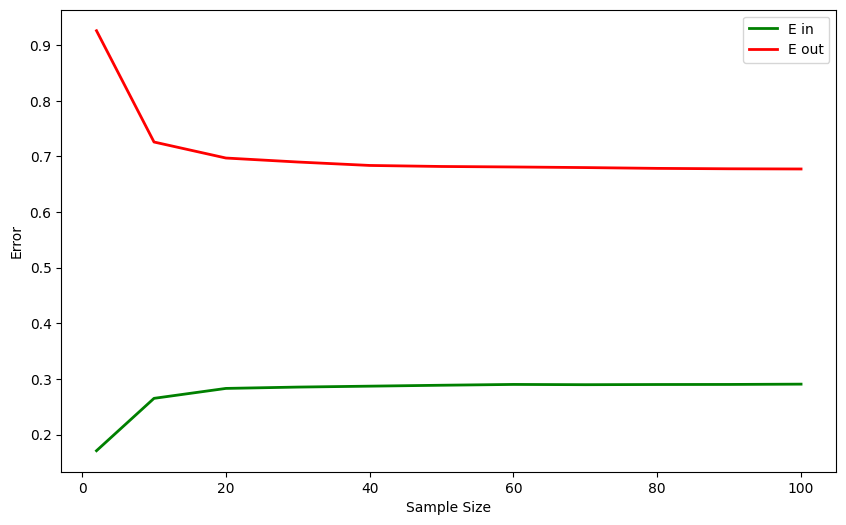

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(sample_size_sets, E_in_all, label='E in', c="green", linewidth=2.0)
plt.plot(sample_size_sets, E_out_all, label='E out', c="red", linewidth=2.0)
plt.xlabel('Sample Size')
plt.ylabel('Error')
plt.legend()
plt.show()